4.1 VGG16 Model Parameters

In [25]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array
from numpy import expand_dims
from scipy import signal

Step2

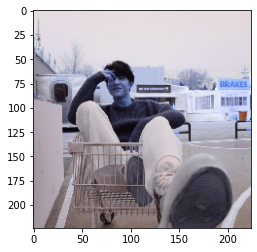

In [36]:
img = cv2.imread("image.jpg")

center = (img.shape[1]/2,img.shape[0]/2)
h = img.shape[0]
w = img.shape[1]
if(h > w):
    h = w
else:
    w = h
img = cv2.getRectSubPix(img, (w,h),center)
img = cv2.resize(img,(224,224))
plt.imshow(img)
# cv2.imshow("img",img)
# cv2.waitKey(0)

In [27]:
model = VGG16()

In [28]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Step3

In [29]:
kernels, biases = model.layers[1].get_weights()

model.layers[1].get_config()

{'name': 'block1_conv1',
 'trainable': True,
 'dtype': 'float32',
 'filters': 64,
 'kernel_size': (3, 3),
 'strides': (1, 1),
 'padding': 'same',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'groups': 1,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

Step4

In [30]:
img = img_to_array(img)

In [31]:
img.shape

(224, 224, 3)

In [32]:
img = expand_dims(img, axis=0)
img_ready = preprocess_input(img)

Step5

In [33]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


Step6

In [34]:
feature_maps = model.predict(img_ready)

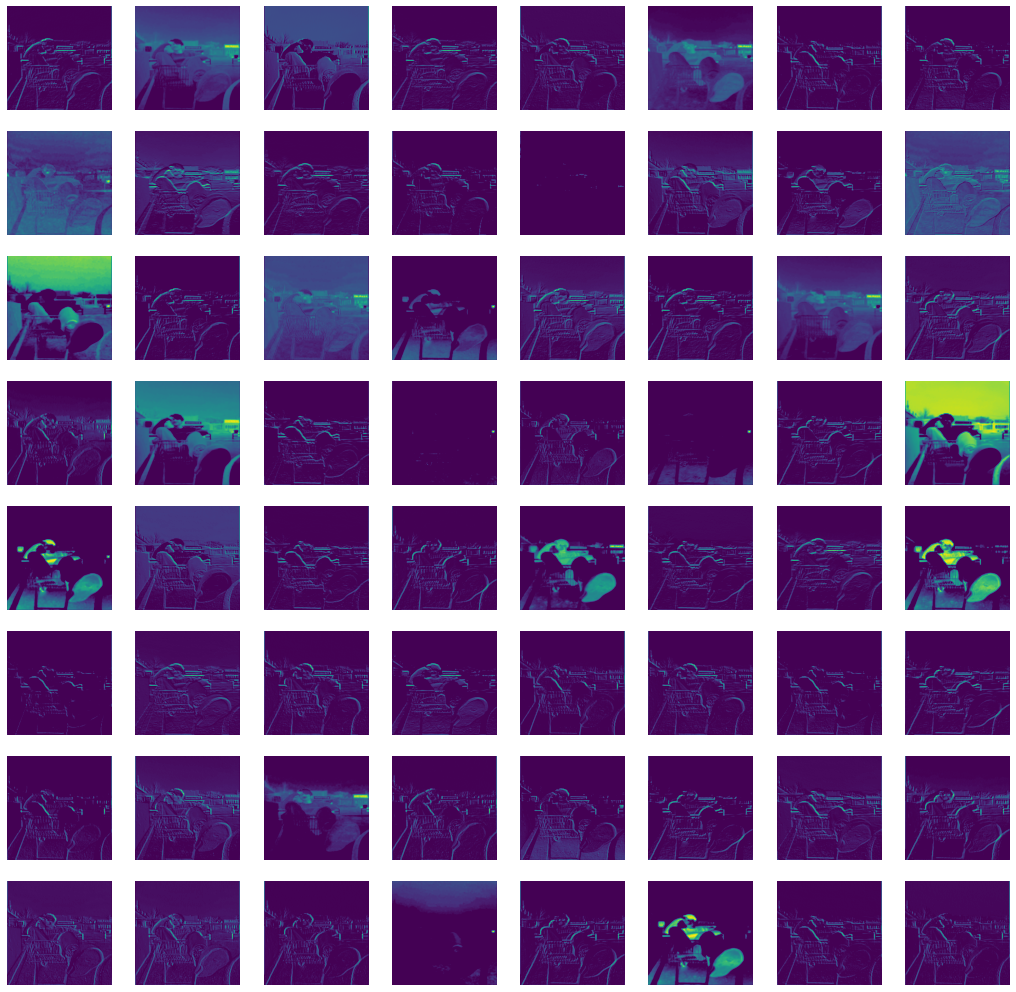

In [35]:
fig, ax = plt.subplots(8, 8, figsize=(18,18))
fig.patch.set_facecolor('white')
index = 0
for i in range(8):
    for j in range(8):
        ax[i,j].imshow(feature_maps[0,:,:,index])
        ax[i,j].axis("off")
        index+=1